In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as mtick
import seaborn as sns

import wf_psf.script_utils as wf_script_utils

In [2]:
def define_plot_style():
    # Define plot paramters
    # Use seaborn style
    sns.set()
    
    plot_style = {
        'figure.figsize': (12,8),
        'figure.dpi': 200,
        'figure.autolayout':True,
        'lines.linewidth': 2,
        'lines.linestyle': '-',
        'lines.marker': 'o',
        'lines.markersize': 10,
        'legend.fontsize': 20,
        'legend.loc': 'best',
        'axes.titlesize': 24,
        'font.size': 22
    }
    mpl.rcParams.update(plot_style)

# Parametric optimisation

In [6]:
metrics_file = '../wf-outputs/metrics/metrics-poly_%s_cycles_pretrained_param_train_%s.npy'
dataset_list = [('1','1e-3'),('1','5e-4'),('1','1e-4'),('1','5e-5'),('1','1e-5'),('1','1e-6')]
n_cycles_list = [1]

In [7]:
metrics_dict_list = wf_script_utils.extract_shape_pix_results([np.load(metrics_file % dataset, allow_pickle=True)[()] for dataset in dataset_list ])
wfe_metrics_dict_list = wf_script_utils.extract_opd_results([np.load(metrics_file % dataset, allow_pickle=True)[()] for dataset in dataset_list ])

metrics_dict_list_np = np.array(metrics_dict_list)
wfe_metrics_dict_list_np = np.array(wfe_metrics_dict_list)


## Optimisation curves

In [8]:
# optimisation history path
optim_hist_path = '../wf-outputs/optim-hist/optim_hist_poly_%s_cycles_pretrained_param_train_%s.npy'
# Load optimisation history
dataset_list = [('1','1e-3'),('1','5e-4'),('1','1e-4'),('1','5e-5'),('1','1e-5'),('1','1e-6')]
n_cycles_list = [1]
dataset_list.reverse()
optim_hist_list = [np.load(optim_hist_path % data_params, allow_pickle=True)[()] for data_params in dataset_list]

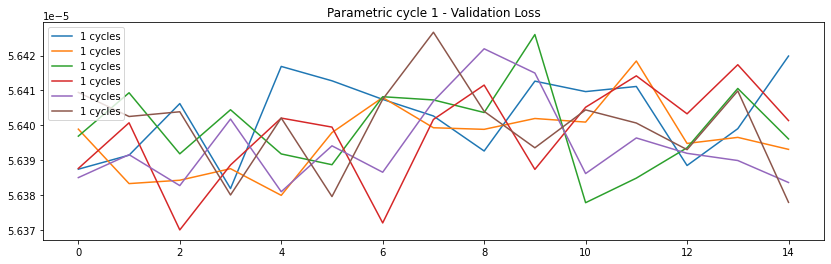

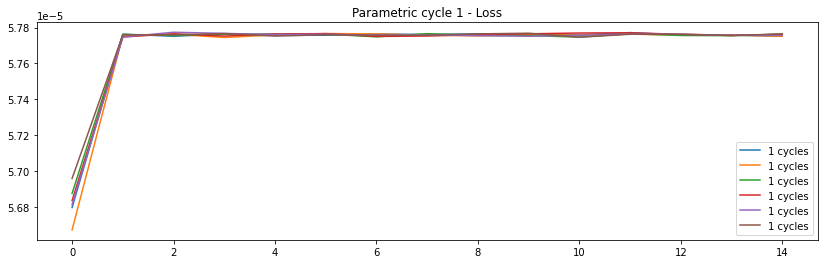

In [9]:
plot_loss = 'val_loss' # options are: 'loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'

for cycle_idx in range(n_cycles_list[-1]):
    plt.figure(figsize=(14,4))
    for idx,hist_stars in enumerate(optim_hist_list):
        if int(dataset_list[idx][0]) >= cycle_idx+1:
            plt.plot(hist_stars['param_cycle{}'.format(cycle_idx+1)][plot_loss], label='%s cycles' % dataset_list[idx][0])
    #plt.yscale('log')
    plt.title('Parametric cycle {} - Validation Loss'.format(cycle_idx+1))
    plt.legend()
    plt.show()


plot_loss = 'loss' # options are: 'loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'

for cycle_idx in range(n_cycles_list[-1]):
    plt.figure(figsize=(14,4))
    for idx,hist_stars in enumerate(optim_hist_list):
        if int(dataset_list[idx][0]) >= cycle_idx+1:
            plt.plot(hist_stars['param_cycle{}'.format(cycle_idx+1)][plot_loss], label='%s cycles' % dataset_list[idx][0])
    #plt.yscale('log')
    plt.title('Parametric cycle {} - Loss'.format(cycle_idx+1))
    plt.legend()
    plt.show()

## Predicted WFE